In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [2]:
## Importando o dataset
db_credit = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls')
db_credit.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
## Renomeando e ajustando as colunas
db_credit.rename(columns={'Unnamed: 0':'id', 'X1':'given_credit', 'X2':'sex', 'X3':'education', 'X4':'marriage',
                          'X5': 'age', 'X6':'status_sept', 'X7':'status_aug', 'X8':'status_jul', 'X9':'status_jun',
                          'X10':'status_mar','X11':'status_apr','X12':'amount_bill_sept', 'X13':'amount_bill_aug',
                          'X14':'amount_bill_jul','X15':'amount_bill_jun', 'X16':'amount_bill_mar','X17':'amount_bill_apr',
                          'X18':'payment_bill_sept','X19':'payment_bill_aug','X20':'payment_bill_jul','X21':'payment_bill_jun',
                          'X22':'payment_bill_mar','X23':'payment_bill_apr', 'Y':'default_payment_next_month'}, inplace = True)
db_credit.drop(0, axis = 0, inplace = True)
db_credit.head()
db_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          30000 non-null  object
 1   given_credit                30000 non-null  object
 2   sex                         30000 non-null  object
 3   education                   30000 non-null  object
 4   marriage                    30000 non-null  object
 5   age                         30000 non-null  object
 6   status_sept                 30000 non-null  object
 7   status_aug                  30000 non-null  object
 8   status_jul                  30000 non-null  object
 9   status_jun                  30000 non-null  object
 10  status_mar                  30000 non-null  object
 11  status_apr                  30000 non-null  object
 12  amount_bill_sept            30000 non-null  object
 13  amount_bill_aug             30000 non-null  ob

In [4]:
## Ajustando os types
db_credit[['id','given_credit','age', 'status_sept', 'status_aug', 'status_jul', 'status_jun',
           'status_mar', 'status_apr', 'amount_bill_sept', 'amount_bill_aug','amount_bill_jul',
           'amount_bill_jun', 'amount_bill_mar', 'amount_bill_apr', 'payment_bill_sept',
           'payment_bill_aug','payment_bill_jul','payment_bill_jun', 'payment_bill_mar',
           'payment_bill_apr']] = db_credit[['id','given_credit','age', 'status_sept', 'status_aug', 'status_jul', 'status_jun',
           'status_mar', 'status_apr', 'amount_bill_sept', 'amount_bill_aug','amount_bill_jul',
           'amount_bill_jun', 'amount_bill_mar', 'amount_bill_apr', 'payment_bill_sept',
           'payment_bill_aug','payment_bill_jul','payment_bill_jun', 'payment_bill_mar',
           'payment_bill_apr']].astype('int')
db_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          30000 non-null  int32 
 1   given_credit                30000 non-null  int32 
 2   sex                         30000 non-null  object
 3   education                   30000 non-null  object
 4   marriage                    30000 non-null  object
 5   age                         30000 non-null  int32 
 6   status_sept                 30000 non-null  int32 
 7   status_aug                  30000 non-null  int32 
 8   status_jul                  30000 non-null  int32 
 9   status_jun                  30000 non-null  int32 
 10  status_mar                  30000 non-null  int32 
 11  status_apr                  30000 non-null  int32 
 12  amount_bill_sept            30000 non-null  int32 
 13  amount_bill_aug             30000 non-null  in

In [5]:
## Ajustando os resultados da variável de saída
db_credit['default_payment_next_month'].replace(['0', '1'], ['no', 'yes'], inplace = True)
db_credit.head()

,id,given_credit,sex,education,marriage,age,status_sept,status_aug,status_jul,status_jun,...,amount_bill_jun,amount_bill_mar,amount_bill_apr,payment_bill_sept,payment_bill_aug,payment_bill_jul,payment_bill_jun,payment_bill_mar,payment_bill_apr,default_payment_next_month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
## Separando a base de treino e teste
train_set, test_set = train_test_split(db_credit, test_size = 0.2, random_state = 0)

x_train_set = train_set.drop('default_payment_next_month', axis = 1)
y_train_set = train_set['default_payment_next_month'].copy()

x_test_set = train_set.drop('default_payment_next_month', axis = 1)
y_test_set = train_set['default_payment_next_month'].copy()

In [7]:
## Criando o modelo de Random Forest
forest = RandomForestClassifier(n_estimators = 1000,
                                max_leaf_nodes = 5, 
                                n_jobs = -1, 
                                random_state = 0)

In [8]:
## Treinando o modelo
forest.fit(x_train_set,y_train_set)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [9]:
## Avaliando a importancia de cada variável na variável resposta
features = x_train_set.columns.values

for name, score in zip(features, forest.feature_importances_*100):
    print (name, score)

forest.feature_importances_.sum()

id 0.0008941689889457213
given_credit 2.095556079819589
sex 0.023221564254393482
education 0.02580172785405381
marriage 0.005851114551715584
age 0.013406084583941933
status_sept 29.67085623981812
status_aug 21.409107514361338
status_jul 12.961592875349936
status_jun 9.941190949323767
status_mar 7.997689076589505
status_apr 6.073344984818632
amount_bill_sept 0.22089307115389584
amount_bill_aug 0.2408474872747867
amount_bill_jul 0.10734085187058388
amount_bill_jun 0.1430115578330471
amount_bill_mar 0.21815002910813192
amount_bill_apr 0.06504850751999869
payment_bill_sept 3.0129603463715604
payment_bill_aug 1.9216429523476088
payment_bill_jul 1.3769805136103612
payment_bill_jun 1.316730242812888
payment_bill_mar 0.4949385239359346
payment_bill_apr 0.6629435358472583


1.0

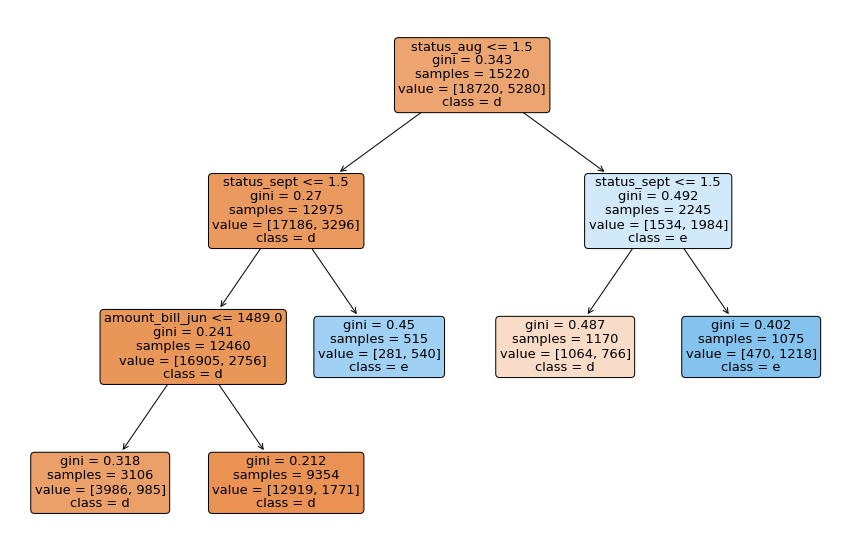

In [10]:
## Plotando a árvore de decisão
fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[7], 
          feature_names=features,
          class_names='default_payment_next_month', 
          filled=True,
          rounded=True);